### 06.05.금

In [18]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm            # 폰트 지정방법
font_name=fm.FontProperties(fname='C:\\Windows\\Fonts\\malgun.ttf').get_name()     
plt.rc('font',family=font_name)



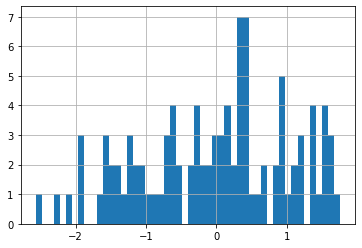

In [3]:
s3=pd.Series(np.random.normal(0,1,size=100))

s3.hist(bins=50)

#### 산포도(산점도,scatter
      - 두 변수의 관계(양,음)
     

[[ 1.87602779 -7.35444831]
 [ 1.68542629 -2.33646631]
 [ 1.82258109 -0.57731581]
 [ 0.50157173 -5.17874523]
 [ 2.46928954 -2.46435793]]


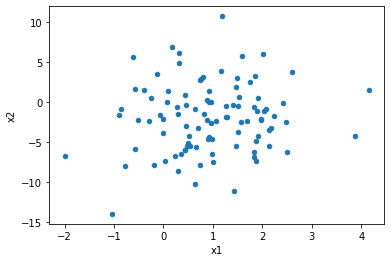

In [11]:
x1=np.random.normal(1,1,size=(100,1))
x2=np.random.normal(-2,4,size=(100,1))


x=np.concatenate((x1,x2),axis=1)
print(x[:5])

df3=pd.DataFrame(x,columns=['x1','x2'])
df3.head()

df3.plot.scatter('x1','x2')

### boxplot
      - 연속형 변수와 이산형 변수를 함께 그리는 그래프
      - 다변량 그래프

### 좀 더 정교한 그래프

In [13]:
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Text(0, 0.5, 'Total Bill')

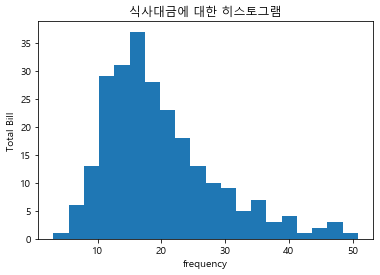

In [19]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

#total_bill 에 대한 금액 분포를 확인
ax.hist(tips['total_bill'],bins=20)
ax.set_title('식사대금에 대한 히스토그램')
ax.set_xlabel('frequency')
ax.set_ylabel('Total Bill')

Text(0, 0.5, 'Tip')

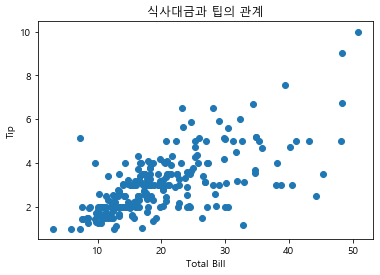

In [21]:
#tip과 total bill의 관계를 알고 싶다.

fig=plt.figure()
ax=fig.add_subplot(1,1,1)

ax.scatter(tips['total_bill'],tips['tip'])
ax.set_title('식사대금과 팁의 관계')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

Text(0, 0.5, 'Tip')

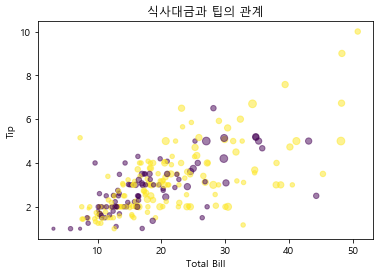

In [31]:
def record_sex(sex):
    if sex=='Female':
        return 0
    else:
        return 1
    
tips['sex_color']=tips['sex'].apply(record_sex)
tips.head()



fig=plt.figure()
ax=fig.add_subplot(1,1,1)

ax.scatter(tips['total_bill'],tips['tip'],c=tips['sex_color'],
           s=tips['size']*10,alpha=0.5)                      
                               # c= 색깔구분?  s=점의 크기!  s=tips['size']*10  ->인원수에 따른 점크기 차이
                               # alpha= 점의 투명도
ax.set_title('식사대금과 팁의 관계')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

Text(0.5, 1.0, '성별에 따른 팁의 관계')

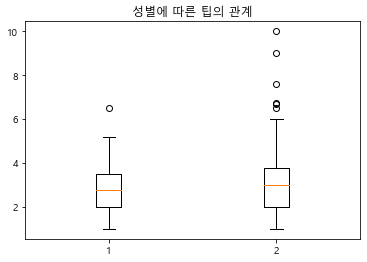

In [33]:
#성별과 tip의 관계


fig=plt.figure()
ax=fig.add_subplot(1,1,1)


ax.boxplot([tips[tips['sex']=='Female']['tip'], 
            tips[tips['sex']=='Male']['tip']])
ax.set_title('성별에 따른 팁의 관계')


Text(0.5, 1.0, '성별에 따른 팁의 관계')

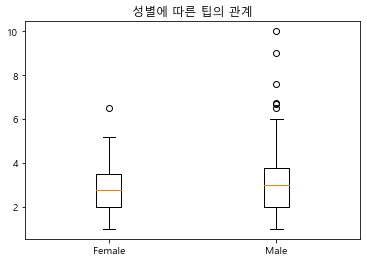

In [35]:
#성별과 tip의 관계


fig=plt.figure()
ax=fig.add_subplot(1,1,1)


ax.boxplot([tips[tips['sex']=='Female']['tip'], 
            tips[tips['sex']=='Male']['tip']],labels=['Female','Male'])
ax.set_title('성별에 따른 팁의 관계')


### seaborn

In [36]:
tips=sns.load_dataset('tips')

Text(0, 0.5, 'Tip')

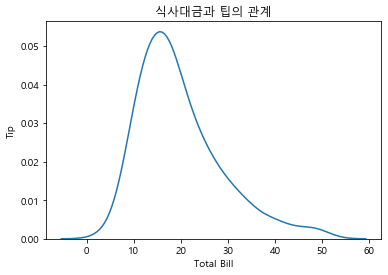

In [38]:
ax=plt.subplot()

#total_bill에 금액분포를 확인
ax=sns.distplot(tips['total_bill'],hist=False)     # hist=False를 하면 히스토그램이 사라진다. 
ax.set_title('식사대금과 팁의 관계')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

Text(0, 0.5, 'Tip')

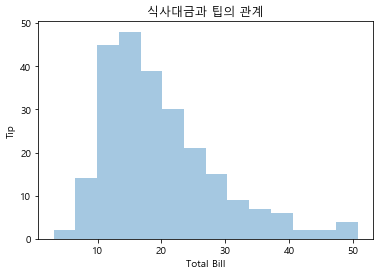

In [40]:
ax=sns.distplot(tips['total_bill'],kde=False)     #kde=False은 선이 사라진다. 
ax.set_title('식사대금과 팁의 관계')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

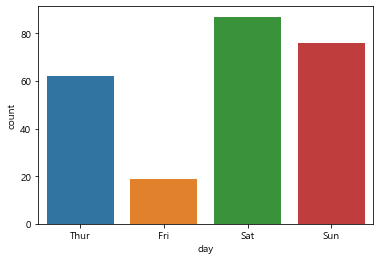

In [42]:
# 요일별로 팁의 빈도수 확인
sns.countplot('day',data=tips)

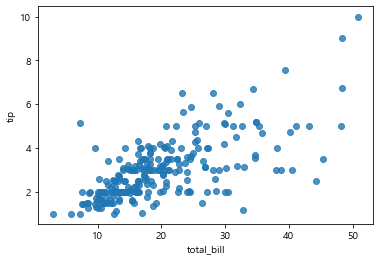

In [44]:
#tip과 total bill의 관계를 알고 싶다.
sns.regplot(x='total_bill',y='tip',data=tips,fit_reg=False)

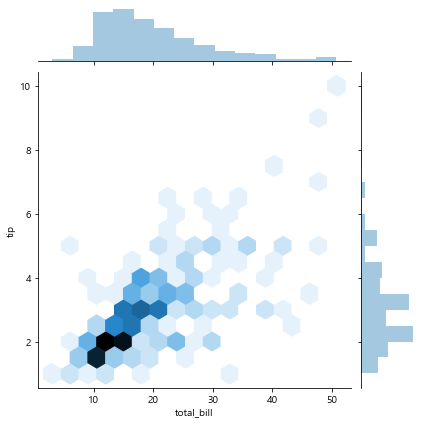

In [46]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='hex')

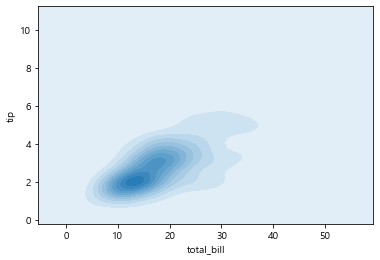

In [49]:
sns.kdeplot(data=tips['total_bill'],data2=tips['tip'],shade=True)

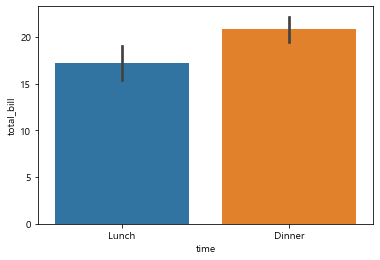

In [50]:
sns.barplot(x='time',y='total_bill',data=tips)


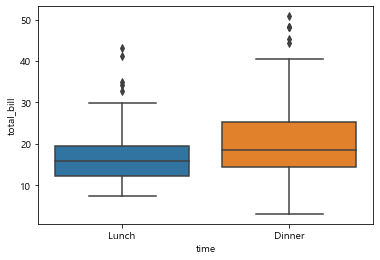

In [51]:
sns.boxplot(x='time',y='total_bill',data=tips)

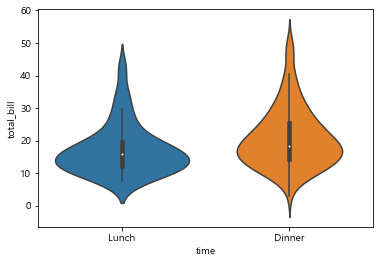

In [53]:
sns.violinplot(x='time',y='total_bill',data=tips)

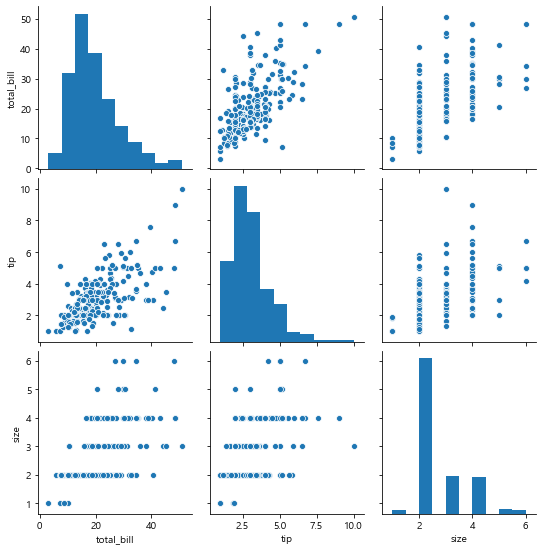

In [54]:
sns.pairplot(tips)

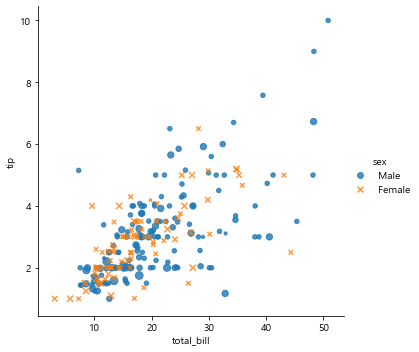

In [66]:
# 성별로 전체 식사대금과 팁의 관계를 확인

sns.lmplot(x='total_bill',y='tip',data=tips,fit_reg=False,hue='sex',
          scatter_kws={'s':tips['size']*10},markers=['o','x'])
#fit
#hue= 색상구분

## 지도시각화
     - pip install folium

In [2]:
import folium

In [4]:
folium.Map(location=[37.243116, 127.106914],zoom_start=15)     #위도와 경도 이용   (구글맵에서 그냥 가져오면 된다,)
folium.Map(location=[37.243116, 127.106914],zoom_start=15,tiles='Stamen Toner')